In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [17]:
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

#### No missing Values

In [18]:
df.dtypes

id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [19]:
from sklearn.preprocessing import StandardScaler

In [87]:
def scale(df):
    if ('FloodProbability' in df.columns):
        df = df.drop(columns=['id','FloodProbability'])
        df=ss.fit_transform(df)
        df=pd.DataFrame(df,columns=ss.get_feature_names_out())
    else:
        df = df.drop(columns=['id'])
        df=ss.fit_transform(df)
        df=pd.DataFrame(df,columns=ss.get_feature_names_out())
    return df

In [40]:
ss = StandardScaler()

In [46]:
X=scale(df)

In [47]:
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.038198,1.467769,0.021561,1.490363,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,-0.455632,-1.417247,0.025627,-0.935421,-0.929312,0.034080,-0.448422,0.999183,0.023754,0.989569,-0.927598
1,0.524488,0.990186,-0.461022,-0.459251,1.467552,1.489938,-0.938943,0.034951,-0.455692,0.504372,1.951149,0.990723,-1.414142,-2.372809,-0.926353,0.035884,-0.929294,-0.943039,-0.451962,-0.927598
2,0.524488,0.035021,0.504143,1.002959,-0.932383,1.003968,-1.899068,0.034951,-0.455692,0.024370,0.507551,0.990723,-0.935421,0.995351,0.034080,0.520189,1.481302,-1.426435,-0.932472,-0.927598
3,-0.934382,-0.442562,0.504143,0.028152,-0.452396,1.489938,-0.458881,1.003010,0.511171,1.464377,0.026351,-1.422018,-0.456700,0.995351,-0.446137,-0.448422,0.517064,0.023754,0.989569,0.029180
4,0.038198,-0.920145,-1.426186,0.515556,-0.452396,-0.453941,-0.938943,-0.933107,-0.939124,-0.935635,0.026351,-1.422018,-1.414142,0.514185,0.514296,-0.448422,-1.893533,-1.426435,-0.932472,0.029180


In [45]:
from sklearn.model_selection import train_test_split

In [48]:
y=df['FloodProbability']

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [53]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers,Sequential

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early = EarlyStopping(monitor='val_loss',mode='min',patience=3)

In [75]:
model = Sequential()

In [76]:
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='relu'))
model.add(layers.Dense(1))

In [77]:
model.compile(optimizer='adam',
             loss='mae')

In [78]:
model.fit(X_train,y_train,epochs=15,verbose=True , validation_data=(X_test,y_test),callbacks=[early])

Epoch 1/15
23408/23408 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 0.0414 - val_loss: 0.0152
Epoch 2/15
23408/23408 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 3/15
23408/23408 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 0.0148 - val_loss: 0.0145


<Axes: >

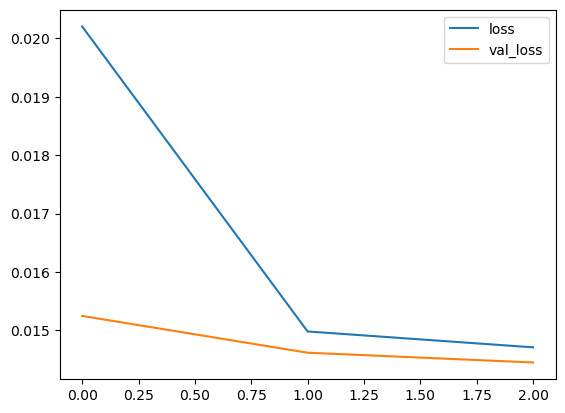

In [79]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

23408/23408 ━━━━━━━━━━━━━━━━━━━━ 20s 834us/step
11529/11529 ━━━━━━━━━━━━━━━━━━━━ 11s 949us/step


In [80]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error

In [83]:
print("Train MAE :: ",mean_absolute_error(train_pred, y_train))
print("Test MAE :: ",mean_absolute_error(test_pred, y_test))

Train MAE ::  0.014459082980112342
Test MAE ::  0.01445165807638934


In [84]:
print("Train MAE :: ",mean_absolute_percentage_error(train_pred, y_train))
print("Test MAE :: ",mean_absolute_percentage_error(test_pred, y_test))

Train MAE ::  0.029610558594924383
Test MAE ::  0.029596657331564292


In [88]:
preds = model.predict(scale(test))

23291/23291 ━━━━━━━━━━━━━━━━━━━━ 21s 916us/step


In [92]:
preds = pd.Series(preds.reshape(745305,))

In [95]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [96]:
sub = pd.DataFrame({
    'id':test['id'],
    'FloodProbability':preds
})

In [101]:
sub.to_csv('sub1.csv',index=False)

In [102]:
sub.shape

(745305, 2)